# Project for intra and inter similarity

### Importing libs

In [56]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import pairwise2 #Does pairwise alignments
from Bio.pairwise2 import format_alignment #formats the alignments into a nice printable version
from scipy import stats

# Main N2

In [35]:
# Try from consensus
horseH1 = "CGATTCAAACGGAGAAGCACAAGGAACAACAATACCTGTGGGGGCTTGTTCCTCAGTGGGAGGAGCTCTGTCTGCACAGAGTTCAGGGACAAGGGCAGGGGACACATATCCTAAAACAAGGATTAGAACTTGGGCACTCAGCATCCCACTGAGCATAGTCACTGTGGCATCAATCACCTTCTTCCTCAGGTTGAGCCAAGTCTCGACTATGAAATATTCTGCCTCATGAATATGCAAATGAGATGAGGTGTACTAAGTTAAATATGGATATGTCTGTGCCCTGAGAGCATCACCCAACAACCACCCCCTCCCACACAGAAAAACCCTGAGAGCACAGCCCCTCACC"
horseH2 = "TCCTAGCCTTGATTCTATCCATACCAAAGGACACTTCTGAGACTGTGTGTCCAACCATCCCCAGACCTGAAGTTGAGGGGTGCCCCCTGGAGAACAGACATGGATCTCACAGCTAAGGGCTCACACTTCTCCAGCACGATTTGCTCCCATGCTGCAGAGACCTGAGTCCCCTATGCTTAGCGTCATGGAGGGGGATGCAAATCTCCCCCAGCTCACCCTCTCCAGGGTTGAAAAGCTGAGCACTGGACCAGGGGCAGCGATCCTGTGCCCC"
horseH3 = "AGATAAATTTATAACTCCATCAATCTGATCCATCTGCACCAAGAACTCTAGACATTGGTAGAAAGAGAGAGGACAGGCTTCTTTTTGTTCCCATGGCTTGTGAAACACCATCCGTCTAGGTATTAGGGAGGAACAGATAATTCTGTGACACAGGAGAGAAATTCCCCCTCAGCTGACCCATCTCTGACATGACCACTGGGGGTCTATGTAAGAAAGAGCAAATGTCTCTCAGCTGGAAGCCCGTCCCACCAGCTGCTTTGCATGTTCCTCCCAGCACCCTGCTGTCCAGAGCCCATATCAACGTGGGTCAGTGCTCTGGGGAAGACTGCTCAGTAGGGCACAGAGGGACC"
horseH4 = "GTTATATGAGGAACCTAGCCCATCATTTCTGGAAACTGAACATTTAAAAATATTTTTGAATTTAAAATAGAAACTCTTCATTAGATCATCTAACAGTTTGTAGTTTTAGGTTCTAAGTTGAATTAGAGCTTCTAAGTTGACTTGTGTGTCTTCTGTCATACAAATCACACACTTTTGGTGATGATATTTTTGGCTCTTGATTTGCATTAGATACTTTCACAACCCACTACTGCACATGCAATTTGCTTCTATACTCATTGAGTGCTTTGCATAGGCCCCTCAGGCCCAGATCAGCTGCTCAGGTTTTATAAAATGGGGTTTCCTGGAGATGGGGCCTGTACTTTGCAGTGTGAGCTGAGCTGCATCAGGCAGGCAGGGGCAGCAAGATTCCGCATCTTC"

monkeyH1 = "ATAGTTCCACCAACACCTGATCACCATCTAAATTTTACTATGTGTTTCCATACAAACAAGAATATTCTCCTAAATAATCCACCATACACCAATGGAAATACATTACTCCATCGAGCCAGGTCCTGAGGAATATTTCTAAATTTTCAAAGAAAAAAAAACCTAAAAAATGTTTCTCATAACAAAATATTCCCTTTACAATGTTTGACAGTAGACGATTCTGTTCTATAGTCCCCAGTAAGAAACACATTGCTCTGCAGACAAATTTGTGCTACCCTGCGTCTTACCTGGGACACCTGGGAGACACTGAGCCTGTGCTGAGTTACTGATCGATGAAGCCAGCCCTGCAGCTGTGCCCAGCCTGCCCCATCCCCTGCTATTTGCATGTTCCACAGAGCACAGCCTCCTCCTGCCCTGAAGACTTATTAATAGGCTGGTCACACTCTGTGCAGGAGTCAGTCCCAGTCAGGACACAGCTGGAC"
monkeyH2 = "ATAAACATTTCCACATATTCATGGTATTTCTGCTTTCTTAAAGAGAAATGTAAAATGCCACTGTGTAAGTGCTAAAAAACTGAGAAATTTCACAGAGAAAACCTTATAGAGCTATCCCTTAAATATAGGCATTCTTGAATTCAGGCAGCATAAATTTTATCTTTTTTTGTTTCCCCCAATGAACATTTAATATCAACATTGATCACATGGAAGAGACATACCCCACTTTGCTCACAAGACACCATTGACTCTTTCCACCCCTTCCCCTTGGCTCTTTCCACCCCACTGCACCCACCAGGGGATTTGCATATTGTCCCCTAGGGAGGACCTTCCCTTGTGAGTCTGAGATAAAAGCTCATGCTCTAACCTTGCCTTGACTGATCAGGACTCCTCAGTTCACCTTCTCACA"
monkeyH3 = "GGAAGAGAGAAATGAATGAACACAGCCTTTTATATTGTTCTTAACAGAGGCTTGTACCAAACACATATTCACTGGTGAATTTAAGGTGATTGAGGAGAAGAAAGACACAGGGTGAAATTCTGTGACCACAGGGAGAAGTTCTACACTCAGCTGAGCCAACAGACTTTTCTGACCTGACACCGGGAGGCACAGGTGCTCAGTGCAGAGAGGAGAGCAGGTGGTCTCTGCAGCTGGAAGCCCAGCTCCCACCCCAGCTGCTTTGCATGTCCCTCCCAGCTGCCCTCCTTCCAGAGCCCATATCAATGCCTGGGTCAGAGCTCTGGGGAGGAACTGCTCAGTTAGGACCCAGAGGGAACC"
monkeyH4 = "TTGATGGAAGTTTTCTGACCAATTTTAATTCTTAATTACTAGGTATTCATTAGATATAGGTGTGTACTAAGCTTTAATTTAGTTTTGTCTTTTCTATCAAATTACATTTCTGTGTGATATTTTTGGTCTTGATTTATGGATACTTTACACCCATCCATGAATTTGCTTACTCTGATGTTTGACCCTTCCAGCCGAGTGCATTTTTAACGGACTTGATTGAACTAGGCACACAGCAGGGCAGCAAG"
monkeyH5 = "CCAGGAAGATCCGTCACCGTGTCTGAGTGACGAATAAGCTGCAGAATATGAGTTTTGCAGAAAAGCAAAGAAAGAAATGTAAGCCCAAGAGGTTACTAATTACTTCTGAGTGTGCACAGTGTGAAGTAAAACATGACTCATGGGTTAGGTTCACACACTGCCATTTAACACTCCTTCTTATCATGTACCAATAATTGCATATTTTCCTATATAACCCTAATTTGGATAATTATGCGTCAAACTGATTAGGAAACTCACCACCTGCAGGTCGGGCCAAG"
monkeyH7 = "CCTACATTGCGACAGAGAGCAGGAGAGTTAACATAGCCCTGGGCCGAGACTGAGGATGTGAGCTGCTGTTCACCCCAGATGACTGCAGACCCTCCCAAGACTGGATGGACTCTGCCTTCACTCTGCAGCTGGGCCCTGGGTCTGGTCAAGCCCTGCGAGCCTCAGCACCGCTCATCTGCAGGTGCCAGCAGAGGGCGCTCTCACACTCACGGAAGGGGCGGGGAGGGCGCTCTCCTGCAACGTGATGTCTGTGTATTTAAACCAATAGGACATCCCCATAATTTGCGCATTATCCTTCCTCTACATCTAAGTGGTCCTGCCTCTCAGTATCTTAAAGAGGCTTTTTCTCGGATGTGGCTGAGCAAAACTGACAAGTCAAGGCGGAAGGCGAG"

monk_array = np.zeros((6,6))
hors_array = np.zeros((4,4))
inter_array = np.zeros((4,6))

maclabels = ["IGKV1", "IGKV2", "IGKV3", "IGKV4", "IGKV5", "IGKV6"  ]
equiplabels = ["IGKV1", "IGKV2", "IGKV3", "IGKV4"]

### Read similarities

INTRA monkey

In [36]:
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH1,1,-1,-0.5,-0.1)
monk_array[0][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH2,1,-1,-0.5,-0.1)
monk_array[0][1]=align_inter[0][2]
monk_array[1][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH3,1,-1,-0.5,-0.1)
monk_array[0][2]=align_inter[0][2]
monk_array[2][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH4,1,-1,-0.5,-0.1)
monk_array[0][3]=align_inter[0][2]
monk_array[3][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH5,1,-1,-0.5,-0.1)
monk_array[0][4]=align_inter[0][2]
monk_array[4][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH1, monkeyH7,1,-1,-0.5,-0.1)
monk_array[0][5]=align_inter[0][2]
monk_array[5][0]=align_inter[0][2]

align_inter = pairwise2.align.globalms(monkeyH2, monkeyH2,1,-1,-0.5,-0.1)
monk_array[1][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH2, monkeyH3,1,-1,-0.5,-0.1)
monk_array[1][2]=align_inter[0][2]
monk_array[2][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH2, monkeyH4,1,-1,-0.5,-0.1)
monk_array[1][3]=align_inter[0][2]
monk_array[3][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH2, monkeyH5,1,-1,-0.5,-0.1)
monk_array[1][4]=align_inter[0][2]
monk_array[4][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH2, monkeyH7,1,-1,-0.5,-0.1)
monk_array[1][5]=align_inter[0][2]
monk_array[5][1]=align_inter[0][2]

align_inter = pairwise2.align.globalms(monkeyH3, monkeyH3,1,-1,-0.5,-0.1)
monk_array[2][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH3, monkeyH4,1,-1,-0.5,-0.1)
monk_array[2][3]=align_inter[0][2]
monk_array[3][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH3, monkeyH5,1,-1,-0.5,-0.1)
monk_array[2][4]=align_inter[0][2]
monk_array[4][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH3, monkeyH7,1,-1,-0.5,-0.1)
monk_array[2][5]=align_inter[0][2]
monk_array[5][2]=align_inter[0][2]

align_inter = pairwise2.align.globalms(monkeyH4, monkeyH4,1,-1,-0.5,-0.1)
monk_array[3][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH4, monkeyH5,1,-1,-0.5,-0.1)
monk_array[3][4]=align_inter[0][2]
monk_array[4][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH4, monkeyH7,1,-1,-0.5,-0.1)
monk_array[3][5]=align_inter[0][2]
monk_array[5][3]=align_inter[0][2]

align_inter = pairwise2.align.globalms(monkeyH5, monkeyH5,1,-1,-0.5,-0.1)
monk_array[4][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(monkeyH5, monkeyH7,1,-1,-0.5,-0.1)
monk_array[4][5]=align_inter[0][2]
monk_array[5][4]=align_inter[0][2]

align_inter = pairwise2.align.globalms(monkeyH7, monkeyH7,1,-1,-0.5,-0.1)
monk_array[5][5]=align_inter[0][2]


monk_array = np.around(monk_array, decimals=1)
print(monk_array)
macaca_diag = np.diagonal(monk_array)

[[479.  197.2 198.8 136.8 143.9 166.1]
 [197.2 409.  164.2 129.  143.7 151.9]
 [198.8 164.2 357.  115.4 134.5 156.3]
 [136.8 129.  115.4 245.  113.7 118.7]
 [143.9 143.7 134.5 113.7 278.  135. ]
 [166.1 151.9 156.3 118.7 135.  392. ]]


Visualization

[Text(0, 0.5, 'IGKV1'),
 Text(0, 1.5, 'IGKV2'),
 Text(0, 2.5, 'IGKV3'),
 Text(0, 3.5, 'IGKV4'),
 Text(0, 4.5, 'IGKV5'),
 Text(0, 5.5, 'IGKV6')]

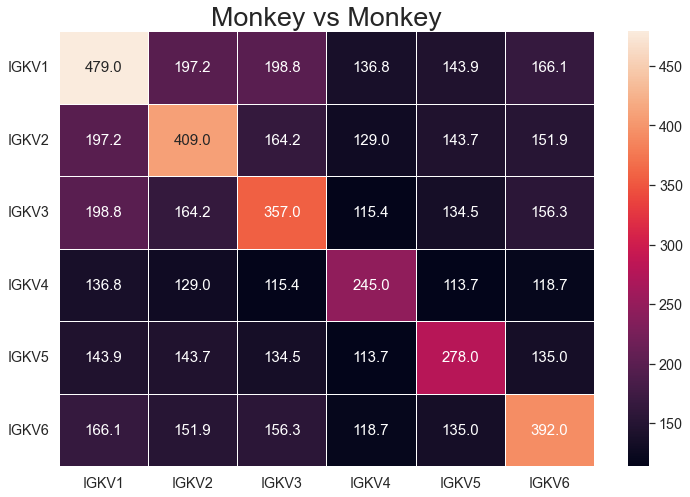

In [37]:
plt.figure(figsize = (12,8))
plt.title("Monkey vs Monkey", size ='xx-large')

# this is for axes
sns.set(font_scale=1.3)
# to show plot
ax = sns.heatmap(monk_array, xticklabels=maclabels, yticklabels=maclabels, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize":15})
# to pivot y axis
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)


Inter

In [38]:
align_inter = pairwise2.align.globalms(horseH1, monkeyH1,1,-1,-0.5,-0.1)
inter_array[0][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, monkeyH2,1,-1,-0.5,-0.1)
inter_array[0][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, monkeyH3,1,-1,-0.5,-0.1)
inter_array[0][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, monkeyH4,1,-1,-0.5,-0.1)
inter_array[0][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, monkeyH5,1,-1,-0.5,-0.1)
inter_array[0][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, monkeyH7,1,-1,-0.5,-0.1)
inter_array[0][5]=align_inter[0][2]


align_inter = pairwise2.align.globalms(horseH2, monkeyH1,1,-1,-0.5,-0.1)
inter_array[1][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, monkeyH2,1,-1,-0.5,-0.1)
inter_array[1][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, monkeyH3,1,-1,-0.5,-0.1)
inter_array[1][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, monkeyH4,1,-1,-0.5,-0.1)
inter_array[1][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, monkeyH5,1,-1,-0.5,-0.1)
inter_array[1][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, monkeyH7,1,-1,-0.5,-0.1)
inter_array[1][5]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH3, monkeyH1,1,-1,-0.5,-0.1)
inter_array[2][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, monkeyH2,1,-1,-0.5,-0.1)
inter_array[2][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, monkeyH3,1,-1,-0.5,-0.1)
inter_array[2][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, monkeyH4,1,-1,-0.5,-0.1)
inter_array[2][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, monkeyH5,1,-1,-0.5,-0.1)
inter_array[2][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, monkeyH7,1,-1,-0.5,-0.1)
inter_array[2][5]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH4, monkeyH1,1,-1,-0.5,-0.1)
inter_array[3][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, monkeyH2,1,-1,-0.5,-0.1)
inter_array[3][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, monkeyH3,1,-1,-0.5,-0.1)
inter_array[3][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, monkeyH4,1,-1,-0.5,-0.1)
inter_array[3][3]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, monkeyH5,1,-1,-0.5,-0.1)
inter_array[3][4]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH4, monkeyH7,1,-1,-0.5,-0.1)
inter_array[3][5]=align_inter[0][2]

inter_diag = np.zeros(0)
inter_array = np.around(inter_array, decimals=1)
print(inter_array)
inter_diag = np.append(inter_diag, inter_array[0][0])
inter_diag = np.append(inter_diag, inter_array[1][1])
inter_diag = np.append(inter_diag, inter_array[2][2])
inter_diag = np.append(inter_diag, inter_array[3][3])
print(inter_diag)

[[164.3 147.3 148.9 107.3 126.4 156.6]
 [145.4 137.6 134.  102.  107.1 139.3]
 [186.7 163.3 215.7 119.3 127.6 154.2]
 [190.2 180.  162.4 178.  141.1 154.1]]
[164.3 137.6 215.7 178. ]


Visualization

[Text(0, 0.5, 'IGKV1'),
 Text(0, 1.5, 'IGKV2'),
 Text(0, 2.5, 'IGKV3'),
 Text(0, 3.5, 'IGKV4')]

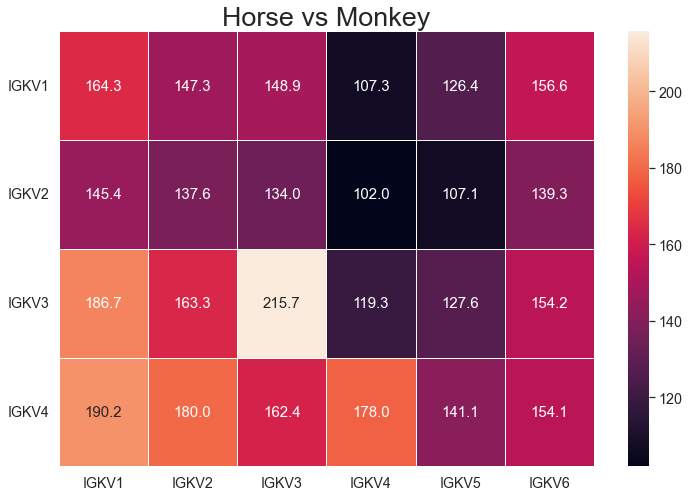

In [39]:
plt.figure(figsize = (12,8))
plt.title("Horse vs Monkey", size ='xx-large')

# this is for axes
sns.set(font_scale=1.3)
# to show plot
ax = sns.heatmap(inter_array, xticklabels=maclabels, yticklabels=equiplabels, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize":15})
# to pivot y axis
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)


INTRA horsey

In [40]:
align_inter = pairwise2.align.globalms(horseH1, horseH1,1,-1,-0.5,-0.1)
hors_array[0][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, horseH2,1,-1,-0.5,-0.1)
hors_array[0][1]=align_inter[0][2]
hors_array[1][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, horseH3,1,-1,-0.5,-0.1)
hors_array[0][2]=align_inter[0][2]
hors_array[2][0]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH1, horseH4,1,-1,-0.5,-0.1)
hors_array[0][3]=align_inter[0][2]
hors_array[3][0]=align_inter[0][2]


align_inter = pairwise2.align.globalms(horseH2, horseH2,1,-1,-0.5,-0.1)
hors_array[1][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, horseH3,1,-1,-0.5,-0.1)
hors_array[1][2]=align_inter[0][2]
hors_array[2][1]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH2, horseH4,1,-1,-0.5,-0.1)
hors_array[1][3]=align_inter[0][2]
hors_array[3][1]=align_inter[0][2]


align_inter = pairwise2.align.globalms(horseH3, horseH3,1,-1,-0.5,-0.1)
hors_array[2][2]=align_inter[0][2]
align_inter = pairwise2.align.globalms(horseH3, horseH4,1,-1,-0.5,-0.1)
hors_array[2][3]=align_inter[0][2]
hors_array[3][2]=align_inter[0][2]

align_inter = pairwise2.align.globalms(horseH4, horseH4,1,-1,-0.5,-0.1)
hors_array[3][3]=align_inter[0][2]



monk_array = np.around(monk_array, decimals=1)
print(monk_array)
macaca_diag = np.diagonal(monk_array)

hors_array = np.around(hors_array, decimals=1)
print(hors_array)
horse_diag = np.diagonal(hors_array)

[[479.  197.2 198.8 136.8 143.9 166.1]
 [197.2 409.  164.2 129.  143.7 151.9]
 [198.8 164.2 357.  115.4 134.5 156.3]
 [136.8 129.  115.4 245.  113.7 118.7]
 [143.9 143.7 134.5 113.7 278.  135. ]
 [166.1 151.9 156.3 118.7 135.  392. ]]
[[346.  132.7 145.6 147.1]
 [132.7 271.  136.3 136.2]
 [145.6 136.3 350.  159.5]
 [147.1 136.2 159.5 399. ]]


Visualazation

[Text(0, 0.5, 'IGKV1'),
 Text(0, 1.5, 'IGKV2'),
 Text(0, 2.5, 'IGKV3'),
 Text(0, 3.5, 'IGKV4')]

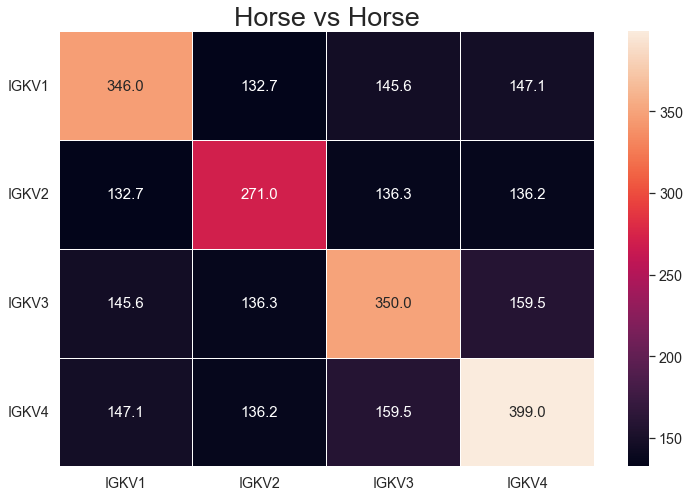

In [41]:
plt.figure(figsize = (12,8))
plt.title("Horse vs Horse", size ='xx-large')

# this is for axes
sns.set(font_scale=1.3)
# to show plot
ax = sns.heatmap(hors_array, xticklabels=equiplabels, yticklabels=equiplabels, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize":15})
# to pivot y axis
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)


Relative horsey

[ 0.021  0.029 -0.027 -0.075]
-0.013


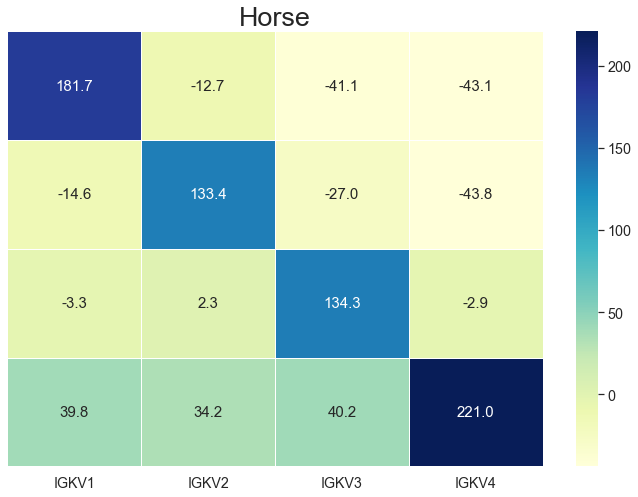

In [42]:
horsey = hors_array-inter_array.T[:][0:4]
horsey = np.around(horsey, decimals=1)

plt.figure(figsize = (12,8))
plt.title("Horse", size ='xx-large')

# this is for axes
sns.set(font_scale=1.3)
# to show plot
ax = sns.heatmap(horsey, xticklabels=equiplabels, yticklabels=False, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize":15}, cmap="YlGnBu")
# to pivot y axis
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)


# Normalize and draw conclusions
exper1 = np.sum(horsey, axis=0)
diag = np.diagonal(horsey)
exper1 = exper1 - diag
exper1 = np.around(exper1/horse_diag, decimals=3)
exper1_mean = np.around(exper1/3, decimals=3)
print(exper1_mean)
exper1_all=np.sum(exper1_mean)
print(np.around(exper1_all/4, decimals=3))

Relative macaca

[ 0.007 -0.     0.031  0.072  0.03  -0.007]
0.022


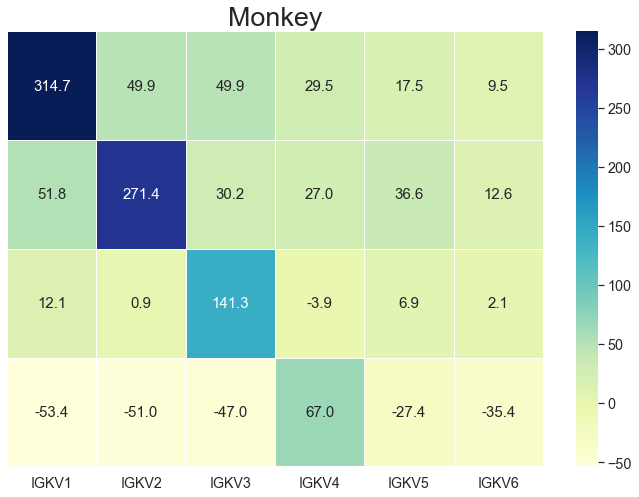

In [43]:
macaca = monk_array[0:4][:]-inter_array
macaca = np.around(macaca, decimals=1)

plt.figure(figsize = (12,8))
plt.title("Monkey", size ='xx-large')

# this is for axes
sns.set(font_scale=1.3)
# to show plot
ax = sns.heatmap(macaca, xticklabels=maclabels, yticklabels=False, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize":15}, cmap="YlGnBu")
# to pivot y axis
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

# Normalize and draw conclusions
exper2 = np.sum(macaca, axis=0)
diag = np.diagonal(macaca)
diag = np.append(diag, 0)
diag = np.append(diag, 0)
exper2 = exper2 - diag
exper2 = np.around(exper2/macaca_diag, decimals=3)
exper2 = exper2/3
exper2[5] = exper2[5]*3/4
exper2[4] = exper2[4]*3/4
exper2_mean = np.around(exper2, decimals=3)
print(exper2_mean)
exper2_all=np.sum(exper2_mean)
print(np.around(exper2_all/6, decimals=3))

In [53]:
sum_m = np.sum(monk_array,axis=0)
sum_m = sum_m-macaca_diag
sum_m = sum_m[0:4]
sum_m = sum_m/5
print(sum_m)
horizontal_m = (inter_diag-sum_m)/macaca_diag[0:4]
horizontal_m =np.around(horizontal_m, decimals=4)
print(horizontal_m) 
print(np.sum(horizontal_m)/3)

[168.56 157.2  153.84 122.72]
[-0.0089 -0.0479  0.1733  0.2256]
0.11403333333333333


In [54]:
sum_h= np.sum(hors_array,axis=0)
sum_h = sum_h-horse_diag
sum_h = sum_h/3
print(sum_h)
horizontal_h = (inter_diag-sum_h)/horse_diag
horizontal_h =np.around(horizontal_h, decimals=4)
print(horizontal_h) 
print(np.sum(horizontal_h)/3)

[141.8        135.06666667 147.13333333 147.6       ]
[0.065  0.0093 0.1959 0.0762]
0.11546666666666666


In [57]:
stat,p = stats.kstest(exper1_mean, exper2_mean[0:4])
print(p)

0.7714285714285716
